In [4]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [5]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [21]:
def histosFromFiles(folder, binwidth, iftoreverse):
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        nbins=np.int(np.amax(histoarray)/binwidth)
        n, bins, patches = plt.hist(histoarray, bins=nbins, density=True, histtype='step',fill=False,\
                            alpha=1, rwidth=1, color=colormap(normalize(filenum)),linewidth=2)
        print(histoarray.size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [7]:
#args set xmin&xmas for the hisogram array
def histosFromFilesLog(folder, nbins, iftoreverse, *bounds):
    print(bounds[1])
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    
        
    global usedcolors
    usedcolors=[]
        
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        if len(bounds) != 0:
            histoarray=histoarray[(histoarray>10**(bounds[0]))&(histoarray<10**(bounds[1]))]
            print(np.amin(histoarray[histoarray>0]))
            
        print("min={}".format(np.amin(histoarray[histoarray>0]))+", max={}".\
                                      format(np.amax(histoarray)))
        
        n, bins, patches = plt.hist(histoarray[histoarray>0], \
                            bins=np.logspace(np.log(np.amin(histoarray[histoarray>0])),\
                                             np.log(np.amax(histoarray)), nbins),\
                            density=True, alpha=0.7, rwidth=1, color=colormap(normalize(filenum)))
        print(histoarray[histoarray>0].size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [8]:
#taking log from X axis and building linear histogram
def histosFromFilesLogX(folder, nbins, xmin, xmax, iftoreverse):
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        print(np.amax(histoarray))
        #cutting requested range
        histoarray=histoarray[(histoarray>xmin)&(histoarray<xmax)]
        print(np.amax(histoarray))
        #taking log
        histoarray = np.log10(histoarray)
        print(np.amax(histoarray))
        n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                            alpha=0.7, color=colormap(normalize(filenum)))
        print(histoarray.size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [9]:
# integrating the area under the histogram and plotting cross section for different parameter ranges

def intergrateHistos(folder, binwidth, iftoreverse, *cuts):
    
    
    #reading files with histos info
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    print(files)
    
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    #print(sigmaLumi)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    
    for sigmafile in sigmaLumi:
        #print(sigmafile)
        for filenum, file in enumerate(files):
            #print(sigmafile[0])
            if (sigmafile[0] in file):
                print(sigmafile[0])
                print(file)
                #print(float(sigmafile[1]))
                histoarray = np.array(genfromtxt(file))
                nbins=np.int(np.amax(histoarray)/binwidth)
                n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                                    alpha=0, rwidth=1, color=colormap(normalize(filenum)))

                usedcolors.append(colormap(normalize(filenum)))
                integral=[]
                for cut in cuts:
                    integral.append(float(sigmafile[1])*binwidth * sum(n[cut:100]))
                plt.plot(cuts,integral,color=colormap(normalize(filenum)))
                plt.xlim(cuts[0],cuts[-1])


In [10]:
def histos2DFromFiles(filex, filey, binwidth):
    
    
    #normalize = mcolors.Normalize(0, len(files))

    global usedcolors
    usedcolors=[]

    histoarrayx = np.array(genfromtxt(filex))
    histoarrayy = np.array(genfromtxt(filey))
    
    nbins=np.int(np.amax(histoarrayx)/binwidth)
    print(nbins)
    
    n = plt.hist2d(histoarrayx, histoarrayy, bins=nbins,\
                   density=True, alpha=0.7, cmap=colormap)
    #print(n)
    #print(usedcolors)


In [8]:
# mC fixed, ml varies

#color scheme
colormap = cm.jet

In [12]:
# mC fixed, ml varies

#color scheme
colormap = cm.jet_r

histos/E_excluded/Elplus_rr1.677e-9_mS1.00e+02_mT2.00e+02_randomSeed_5Kevents.dat
5000


IndexError: list index out of range

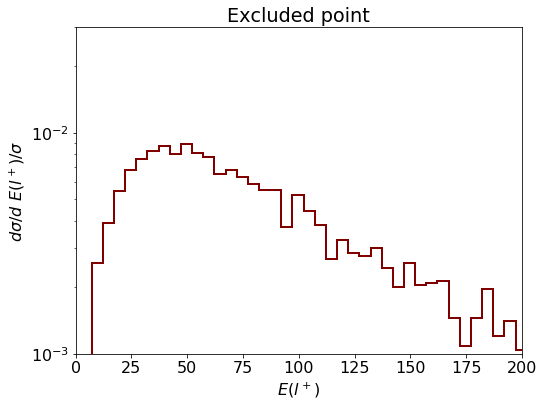

In [22]:
#excluded point

plt.figure(figsize=(8, 6))

histosFromFiles('histos/E_excluded',5,True)


plt.xlim(0,200)
plt.ylim(10**(-3),3*10**(-2))
plt.yscale("log")

plt.title("Excluded point")
plt.xlabel('$E(l^+)$')
plt.ylabel('$d\\sigma/d\ E(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='Nastya, 5K')
patch2 = mpatches.Patch(color=usedcolors[1], label='AR, 5K')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('E_excluded_5K.png')

In [7]:
#pT for benchmarks

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT',2, True)


plt.xlim(0,100)
plt.ylim(10**(-4),8*10**(-1))
plt.yscale("log")

plt.title("benchmark points")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_l=500$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_l=300$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_l=100$')
plt.legend(handles=[patch1, patch2, patch3],loc='upper right')

#plt.savefig('ptl_bencmark.png')

histos/pT/3_pTl_500.dat


NameError: name 'colormap' is not defined

<Figure size 576x432 with 0 Axes>

['histos/pT_mCfixed_mlvaries/cross_sections_mCfixed.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat', 'histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat']
rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat


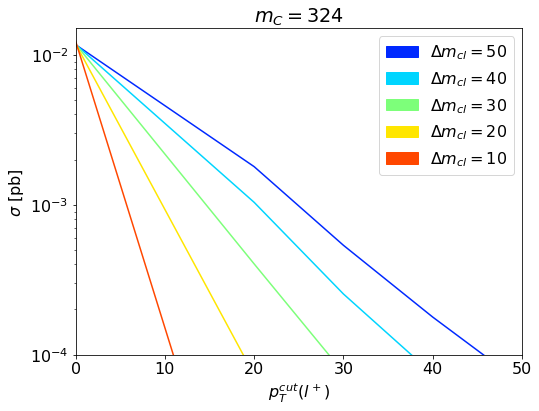

In [72]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_mCfixed_mlvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-2))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_mTfixed.png')

histos/d0_ctau01cm/d0_mu.dat
34686
histos/d0_ctau01cm/d0_e.dat
55480


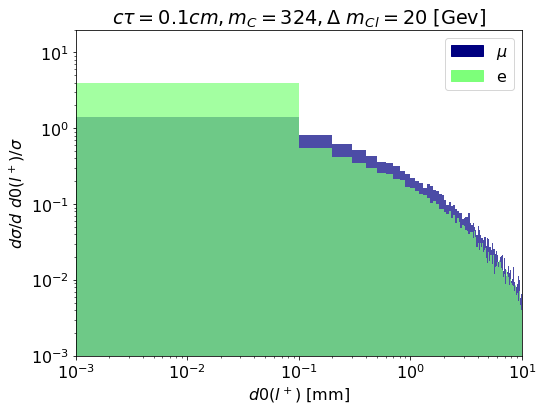

In [20]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/d0_ctau01cm',0.1,True)


plt.xlim(0.001,10)
plt.ylim(10**(-3),20)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=0.1 cm,m_C=324,\\Delta\ m_{Cl}=20$ [Gev]")
plt.xlabel('$d0(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau01.png')

histos/d0_ctau01cm/d0_mu.dat
82.319744
9.999757
0.9999894465158644
33385
histos/d0_ctau01cm/d0_e.dat
1259.57815
9.988782
0.9995125349799222
37209


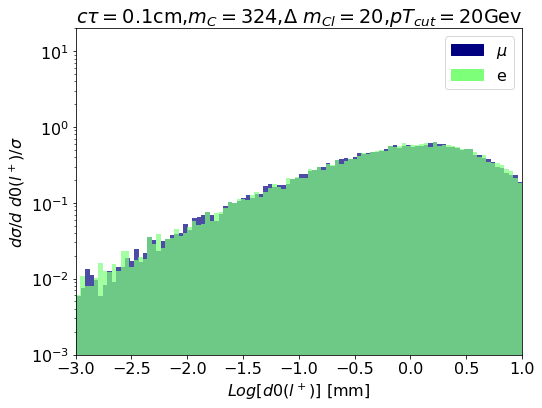

In [15]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau01cm',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=0.1$cm,$m_C=324$,$\\Delta\ m_{Cl}=20$,$pT_{cut}=20$Gev")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau01cm_LogX_nocut.png')

histos/d0_ctau01cm_cut/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_mu_cut.dat
33.929189
9.963634
0.9984177659640499
3026
histos/d0_ctau01cm_cut/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_e_cut.dat
25.667719
9.870984
0.9943604479552767
3177


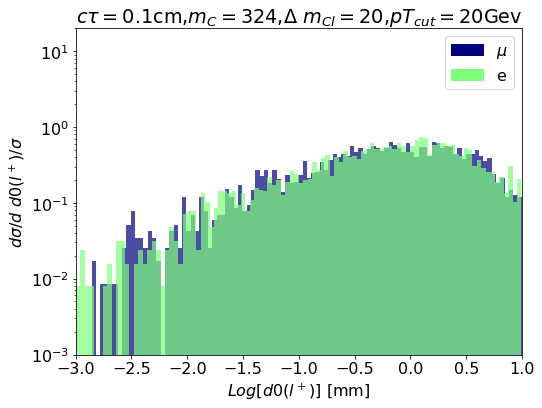

In [14]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau01cm_cut',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=0.1$cm,$m_C=324$,$\\Delta\ m_{Cl}=20$,$pT_{cut}=20$Gev")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau01cm_LogX.png')

histos/d0_ctau01cm_cut/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_mu_cut.dat
3090
histos/d0_ctau01cm_cut/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_e_cut.dat
3284


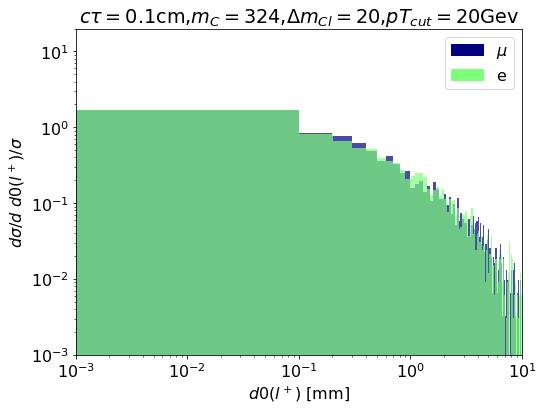

In [8]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/d0_ctau01cm_cut',0.1,True)


plt.xlim(0.001,10)
plt.ylim(10**(-3),20)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=0.1$cm,$m_C=324$,$\\Delta m_{Cl}=20$,$pT_{cut}=20$Gev")
plt.xlabel('$d0(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

#plt.savefig('d0_ctau01_pTcut20.png')

histos/d0_ctau2cm/d0_mu.dat
34568
histos/d0_ctau2cm/d0_e.dat
54180


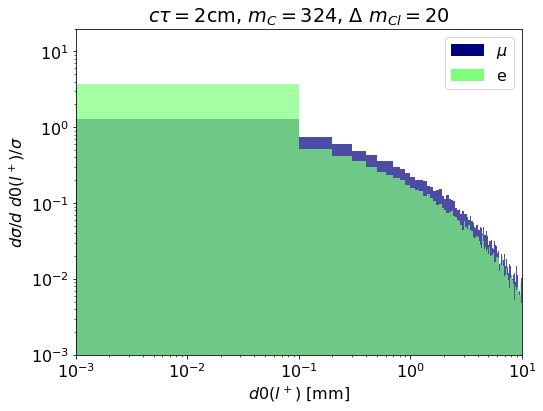

In [9]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/d0_ctau2cm',0.1,True)


plt.xlim(0.001,10)
plt.ylim(10**(-3),20)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$d0(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm.png')

histos/d0_ctau2cm_AR/ARd0_mu_cut.dat
711
histos/d0_ctau2cm_AR/ARd0_e_cut.dat
730


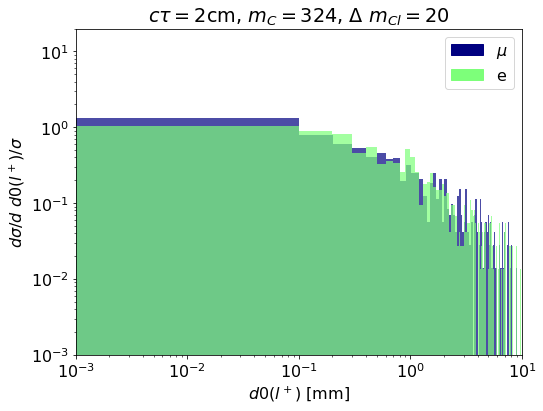

In [10]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/d0_ctau2cm_AR',0.1,True)


plt.xlim(0.001,10)
plt.ylim(10**(-3),20)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$d0(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_AR.png')

histos/d0_ctau2cm/d0_mu.dat
95.991742
9.995709
0.9998136042437451
33137
histos/d0_ctau2cm/d0_e.dat
464.328815
9.978351
0.9990587766809377
36713


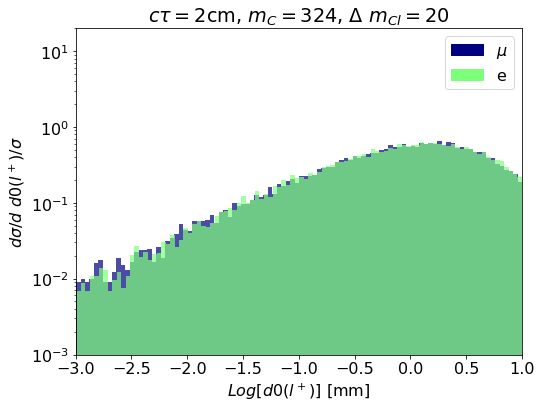

In [35]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau2cm',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_LogX_nocut.png')

histos/d0_ctau2cm_pT20/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_mu_cut.dat
28.941239
9.929707
0.9969364337762913
3389
histos/d0_ctau2cm_pT20/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_e_cut.dat
52.865044
9.925107
0.9967351974763693
3726


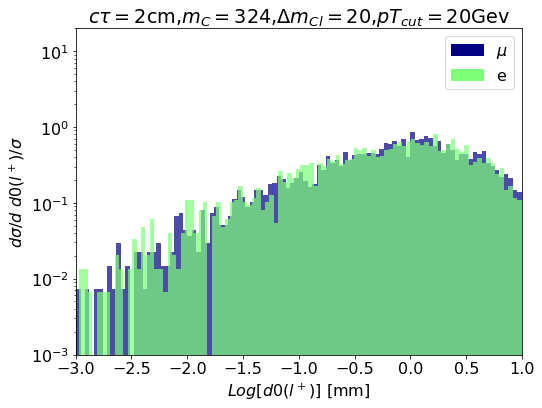

In [13]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau2cm_pT20',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")
plt.title("$c\\tau=2$cm,$m_C=324$,$\\Delta m_{Cl}=20$,$pT_{cut}=20$Gev")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_LogX_cutpT20.png')

# AR

histos/d0_ctau2cm_AR_nocut/d0_mu.dat
67.675815
9.941958
0.9974719241211489
6969
histos/d0_ctau2cm_AR_nocut/d0_e.dat
917.017209
9.996296
0.9998391075247768
8153


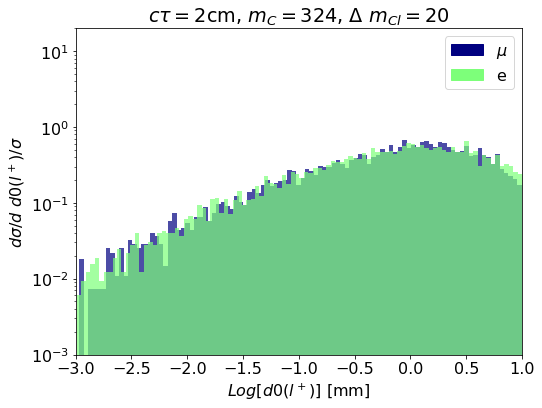

In [19]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau2cm_AR_nocut',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_AR_LogX_nocut.png')

histos/d0_ctau2cm_AR/ARd0_mu_cut.dat
20.186733
8.852591
0.9470703997729587
692
histos/d0_ctau2cm_AR/ARd0_e_cut.dat
15.014349
9.692828
0.986450506215729
715


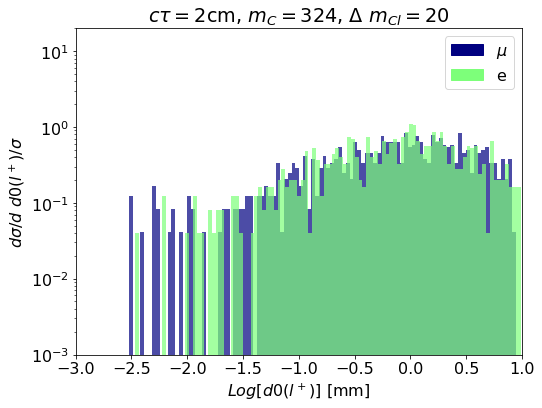

In [34]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau2cm_AR',100,10**(-3),10**(1),True)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$Log[d0(l^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_AR_LogX.png')

1
histos/d0_ctau2cm_pT20/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_mu_cut.dat
0.001009
min=0.001009, max=9.929707
3389
histos/d0_ctau2cm_pT20/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_e_cut.dat
0.001074
min=0.001074, max=9.925107
3726


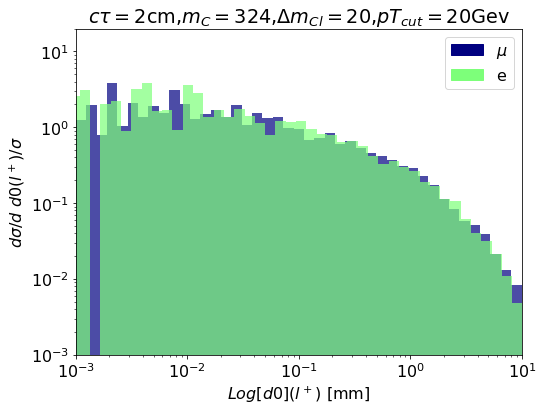

In [76]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/d0_ctau2cm_pT20',100,True,-3,1)

plt.xlim(10**(-3),10**(1))
plt.ylim(10**(-3),20)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm,$m_C=324$,$\\Delta m_{Cl}=20$,$pT_{cut}=20$Gev")
plt.xlabel('$Log[d0](l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_pTcut20_100bins_log.png')

# AR+me

histos/d0_ctau2cm_AR-Nastya_nocut/d0_e_AR.dat
917.017209
9.996296
0.9998391075247768
8153
histos/d0_ctau2cm_AR-Nastya_nocut/d0_e_Nastya.dat
464.328815
9.978351
0.9990587766809377
36713


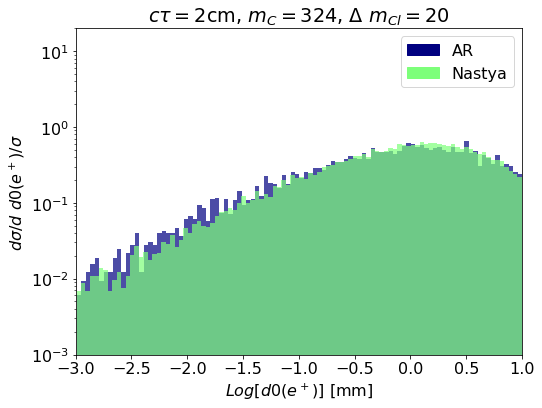

In [29]:
#d0(l)

plt.figure(figsize=(8, 6))

histosFromFilesLogX('histos/d0_ctau2cm_AR-Nastya_nocut',100,10**(-3),10**(1),False)


plt.xlim(-3,1)
plt.ylim(10**(-3),20)
plt.yscale("log")
#plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $\\Delta\ m_{Cl}=20$")
plt.xlabel('$Log[d0(e^+)]$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(e^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='AR')
patch2 = mpatches.Patch(color=usedcolors[1], label='Nastya')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('d0_ctau2cm_AR-Nastya_LogX_nocut_100bins.png')

IndexError: list index out of range

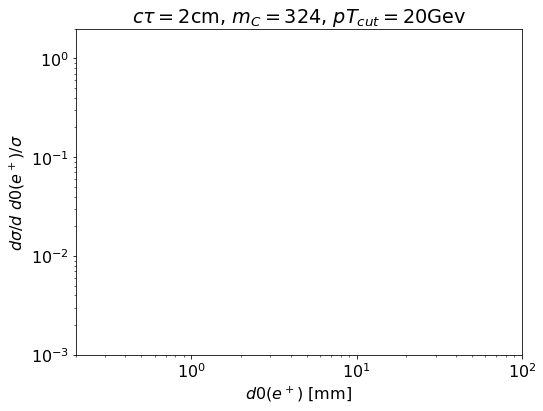

In [8]:
#d0(e) different splittings 

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/d0_e_ctau2cm_different_splittings',400,True)


plt.xlim(0.2,100)
plt.ylim(10**(-3),2)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $pT_{cut}=20$Gev")
plt.xlabel('$d0(e^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(e^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=10$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=20$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=40$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=50$')

plt.legend(handles=[patch5,patch4,patch3,patch2,patch1],loc='upper right')

#plt.savefig('d0(e)_ctau2cm_different_splittings_pTcut.png')

histos/d0_mu_ctau2cm_different_splittings/rr1.00e-08_mS3.14e+02_mT3.24e+02d0_mu_cut.dat
350
min=-8.947976107508692, max=4.397023788074884
6
histos/d0_mu_ctau2cm_different_splittings/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_mu_cut.dat
3467
min=-9.09701168666918, max=3.365267533002864
758
histos/d0_mu_ctau2cm_different_splittings/rr1.00e-08_mS2.95e+02_mT3.24e+02d0_mu_cut.dat
8419
min=-13.815510557964274, max=2.5898949961994435
3496
histos/d0_mu_ctau2cm_different_splittings/rr1.00e-08_mS2.85e+02_mT3.24e+02d0_mu_cut.dat
14016
min=-13.815510557964274, max=1.6248700225264674
650
histos/d0_mu_ctau2cm_different_splittings/rr1.00e-08_mS2.75e+02_mT3.24e+02d0_mu_cut.dat
18449
min=-13.815510557964274, max=0.9435287850070628
1833


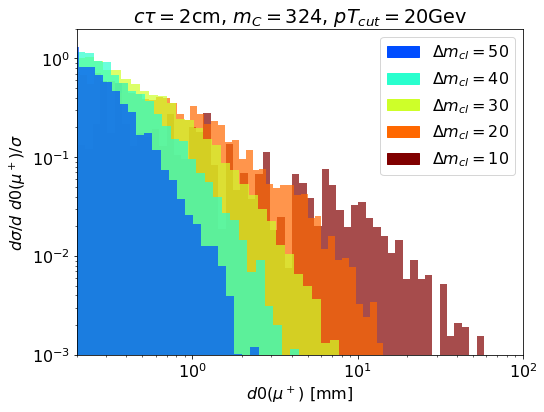

In [95]:
#d0(e) different splittings 

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/d0_mu_ctau2cm_different_splittings',300,True)


plt.xlim(0.2,100)
plt.ylim(10**(-3),2)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $pT_{cut}=20$Gev")
plt.xlabel('$d0(\\mu^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(\\mu^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=10$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=20$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=40$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=50$')

plt.legend(handles=[patch5,patch4,patch3,patch2,patch1],loc='upper right')

plt.savefig('d0(mu)_ctau2cm_different_splittings_pTcut.png')

histos/lifetime_ctau2cm_different_splittings/rr1.00e-08_mS2.75e+02_mT3.24e+02_ctau_plus.dat
99998
min=-9.396669950167675, max=5.645702077096326
63522
histos/lifetime_ctau2cm_different_splittings/rr1.00e-08_mS2.85e+02_mT3.24e+02_ctau_plus.dat
99999
min=-9.484777217677943, max=5.9289757372096785
21853
histos/lifetime_ctau2cm_different_splittings/rr1.00e-08_mS2.95e+02_mT3.24e+02_ctau_plus.dat
99998
min=-8.138756755695992, max=5.802603112857759
1861
histos/lifetime_ctau2cm_different_splittings/rr1.00e-08_mS3.04e+02_mT3.24e+02_ctau_plus.dat
100000
min=-10.770988120240851, max=5.9134126150666795
2008
histos/lifetime_ctau2cm_different_splittings/rr1.00e-08_mS3.14e+02_mT3.24e+02_ctau_plus.dat
100000
min=-7.395515629817131, max=6.291968161790211
55370


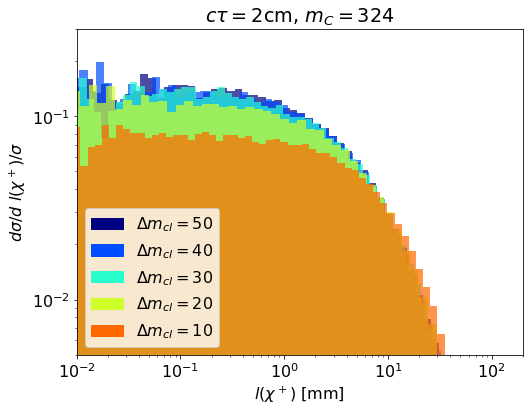

In [12]:
#l(chi+) different splittings 

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/lifetime_ctau2cm_different_splittings',200,False)


plt.xlim(10**(-2),200)
plt.ylim(5*10**(-3),0.3)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$")
plt.xlabel('$l(\\chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ l(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')

patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='lower left')

plt.savefig('l_ctau2cm_different_splittings.png')

histos/ctau_plus/ctau_plus.dat
221868
min=-10.41431317630212, max=6.085188590116696
3057


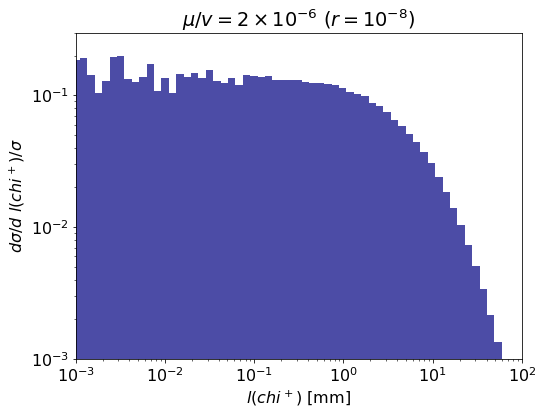

In [10]:
#ctau(chil)

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/ctau_plus',200,True)


plt.xlim(10**(-3),100)
plt.ylim(10**(-3),0.3)
plt.yscale("log")
plt.xscale("log")

plt.title("$\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$l(chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ l(chi^+)/\\sigma$')


plt.savefig('ctau_rr10-8.png')

histos/ctau_plus_rr10-9/ctau_plus.dat
19999
min=-8.06293791913864, max=5.864186035839224
14140


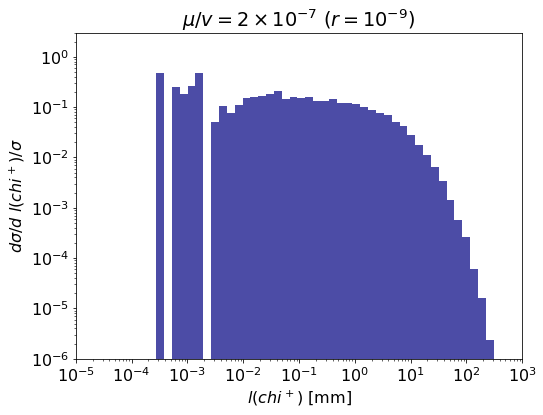

In [19]:
#ctau(chil)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/ctau_plus_rr10-9',0.01,True)

plt.xlim(10**(-5),1000)
plt.ylim(10**(-6),3)

plt.yscale("log")
plt.xscale("log")

plt.title("$\\mu/v=2\\times 10^{-7}\ (r=10^{-9})$")
plt.xlabel('$l(chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ l(chi^+)/\\sigma$')


plt.savefig('ctau_rr10-9.png')

histos/pT_psiplus_ctau01cm/pTpsiminus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pT_psiplus_ctau01cm/pTpsiminus_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pT_psiplus_ctau01cm/pTpsiminus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pT_psiplus_ctau01cm/pTpsiminus_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pT_psiplus_ctau01cm/pTpsiminus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


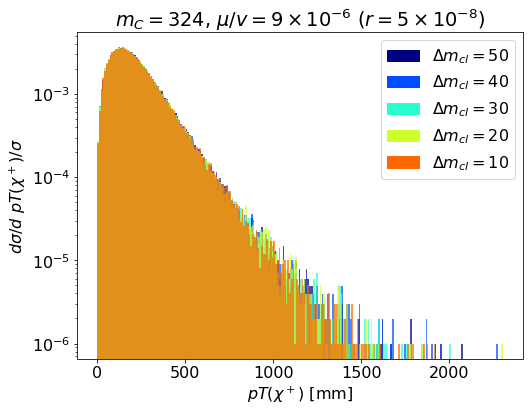

In [9]:
#pT(chi+)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_psiplus_ctau01cm',10,False)


#plt.xlim(10**(-1),200)
#plt.ylim(10**(-4),0.3)
plt.yscale("log")
#plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=9\\times 10^{-6}\ (r=5\\times 10^{-8})$")
plt.xlabel('$pT(\\chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ pT(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('pT_ctau01cm_different_splittings_Madanalysis.png')

histos/pT_psiplus_ctau2cm/pTpsiminus_rr1.00e-08_mS2.75e+02_mT3.24e+02.dat
50000
histos/pT_psiplus_ctau2cm/pTpsiminus_rr1.00e-08_mS2.85e+02_mT3.24e+02.dat
50000
histos/pT_psiplus_ctau2cm/pTpsiminus_rr1.00e-08_mS2.95e+02_mT3.24e+02.dat
50000
histos/pT_psiplus_ctau2cm/pTpsiminus_rr1.00e-08_mS3.04e+02_mT3.24e+02.dat
50000
histos/pT_psiplus_ctau2cm/pTpsiminus_rr1.00e-08_mS3.14e+02_mT3.24e+02.dat
50000


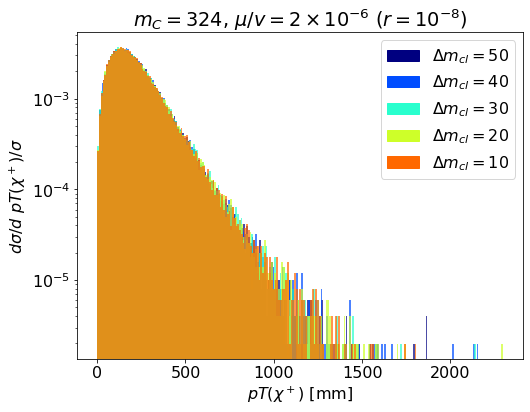

In [18]:
#pT(chi+)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_psiplus_ctau2cm',10,False)


#plt.xlim(10**(-1),200)
#plt.ylim(10**(-4),0.3)
plt.yscale("log")
#plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$pT(\\chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ pT(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('pT_ctau2cm_different_splittings_Madanalysis.png')

histos/pT_ctau2cm_different_splittings/rr1.00e-08_mS2.75e+02_mT3.24e+02_pT_plus.dat
663204
histos/pT_ctau2cm_different_splittings/rr1.00e-08_mS2.85e+02_mT3.24e+02_pT_plus.dat
663522
histos/pT_ctau2cm_different_splittings/rr1.00e-08_mS2.95e+02_mT3.24e+02_pT_plus.dat
665204
histos/pT_ctau2cm_different_splittings/rr1.00e-08_mS3.04e+02_mT3.24e+02_pT_plus.dat
664175
histos/pT_ctau2cm_different_splittings/rr1.00e-08_mS3.14e+02_mT3.24e+02_pT_plus.dat
664296


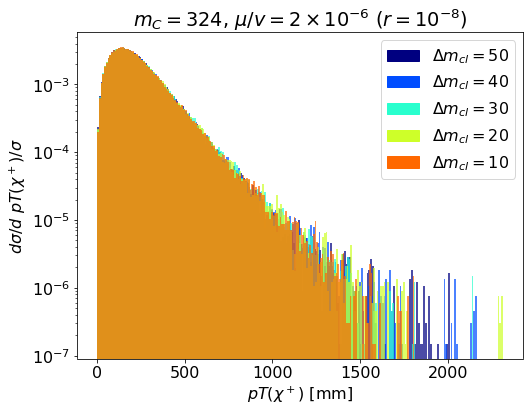

In [19]:
#pT(chi+)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_ctau2cm_different_splittings',10,False)


#plt.xlim(10**(-1),200)
#plt.ylim(10**(-4),0.3)
plt.yscale("log")
#plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$pT(\\chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ pT(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('pT_ctau2cm_different_splittings.png')

histos/beta_ctau2cm_different_splittings/rr1.00e-08_mS2.75e+02_mT3.24e+02_beta_plus.dat
663204
histos/beta_ctau2cm_different_splittings/rr1.00e-08_mS2.85e+02_mT3.24e+02_beta_plus.dat
663522
histos/beta_ctau2cm_different_splittings/rr1.00e-08_mS2.95e+02_mT3.24e+02_beta_plus.dat
665204
histos/beta_ctau2cm_different_splittings/rr1.00e-08_mS3.04e+02_mT3.24e+02_beta_plus.dat
664175
histos/beta_ctau2cm_different_splittings/rr1.00e-08_mS3.14e+02_mT3.24e+02_beta_plus.dat
664296


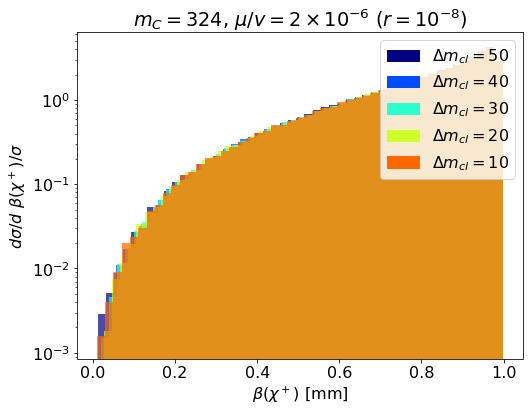

In [22]:
#pT(chi+)

plt.figure(figsize=(8, 6))

histosFromFiles('histos/beta_ctau2cm_different_splittings',0.02,False)


#plt.xlim(10**(-1),200)
#plt.ylim(10**(-4),0.3)
plt.yscale("log")
#plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$\\beta(\\chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ \\beta(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('beta_ctau2cm_different_splittings.png')

histos/betagamma_plus_rr10-8/betagamma_plus.dat
1329058
min=-4.235815964892286, max=2.6977827373010372
696508


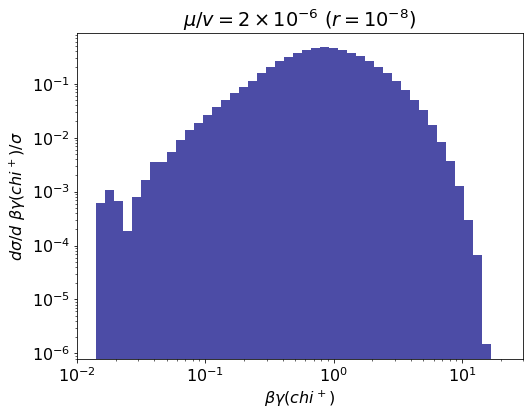

In [83]:
#beta*gamma

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/betagamma_plus_rr10-8',100,True)

plt.xlim(10**(-2),30)
#plt.ylim(10**(-6),3)

plt.yscale("log")
plt.xscale("log")

plt.title("$\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$\\beta \\gamma(chi^+)$')
plt.ylabel('$d\\sigma/d\ \\beta \\gamma (chi^+)/\\sigma$')


plt.savefig('betagamma_rr10-8.png')

histos/betagamma_ctau2cm_different_splittings/rr1.00e-08_mS2.75e+02_mT3.24e+02_betagamma_plus.dat
663204
min=-4.483306598231251, max=2.7918879140100303
646545
histos/betagamma_ctau2cm_different_splittings/rr1.00e-08_mS2.85e+02_mT3.24e+02_betagamma_plus.dat
663522
min=-4.0842952263690995, max=2.6871593659225486
336430
histos/betagamma_ctau2cm_different_splittings/rr1.00e-08_mS2.95e+02_mT3.24e+02_betagamma_plus.dat
665204
min=-3.9742176090212635, max=2.658662248292747
29224
histos/betagamma_ctau2cm_different_splittings/rr1.00e-08_mS3.04e+02_mT3.24e+02_betagamma_plus.dat
672482
min=-4.100221799394977, max=2.6290615377287536
313199
histos/betagamma_ctau2cm_different_splittings/rr1.00e-08_mS3.14e+02_mT3.24e+02_betagamma_plus.dat
664296
min=-4.670135464840451, max=2.6937155491439855
492299
histos/betagamma_ctau2cm_different_splittings/rr1.2.00e-08_mS3.04e+02_mT3.24e+02_betagamma_plus.dat
664175
min=-3.635300773212707, max=2.653880211588496
630867


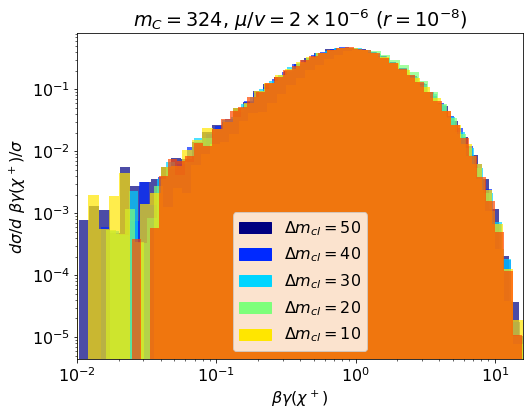

In [82]:
#beta*gamma

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/betagamma_ctau2cm_different_splittings',100,False)

plt.xlim(10**(-2),16)
#plt.ylim(10**(-6),3)

plt.yscale("log")
plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$\\beta \\gamma(\\chi^+)$')
plt.ylabel('$d\\sigma/d\ \\beta \\gamma (\\chi^+)/\\sigma$')

patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='lower center')


plt.savefig('betagamma_ctau2cm_different_splittings.png')

histos/pT_pythia/pT_mu.dat
49185
histos/pT_pythia/pT_e.dat
129129


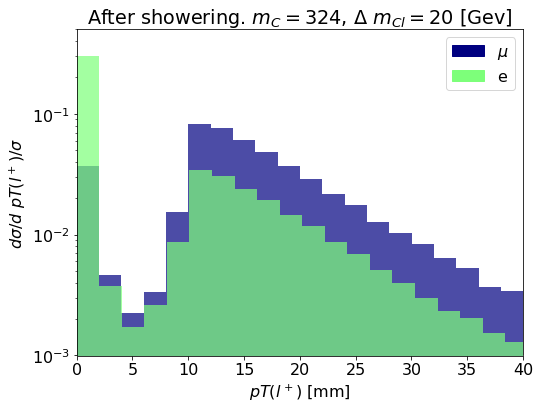

In [8]:
#reconstructed leptons

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_pythia',2,True)


plt.xlim(0,40)
plt.ylim(10**(-3),5*10**(-1))
plt.yscale("log")

plt.title("After showering. $m_C=324$, $\\Delta\ m_{Cl}=20$ [Gev]")
plt.xlabel('$pT(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ pT(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('pT(l)_pythia.png')

histos/pT_pythia_cut/mu_cut_cutpT.dat
43003
histos/pT_pythia_cut/e_cut_cutpT.dat
46035


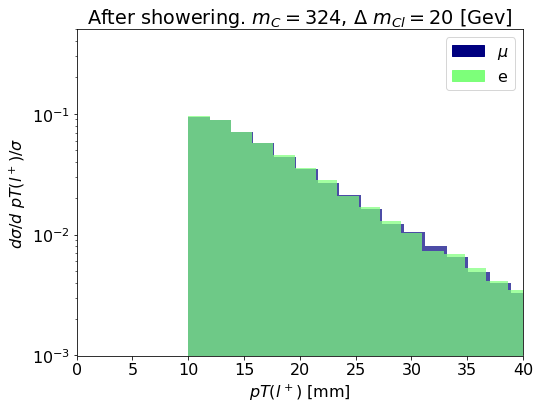

In [10]:
#reconstructed leptons

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_pythia_cut',2,True)


plt.xlim(0,40)
plt.ylim(10**(-3),5*10**(-1))
plt.yscale("log")

plt.title("After showering. $m_C=324$, $\\Delta\ m_{Cl}=20$ [Gev]")
plt.xlabel('$pT(l^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ pT(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\mu$')
patch2 = mpatches.Patch(color=usedcolors[1], label='e')

plt.legend(handles=[patch1, patch2],loc='upper right')

plt.savefig('pT(l)_pythia_cut.png')

37


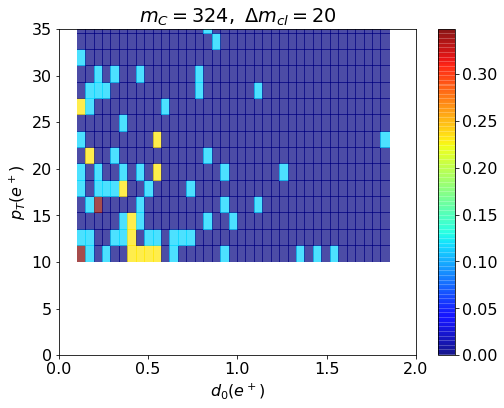

In [55]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(8, 6))

histos2DFromFiles('histos/d0_real_cut_d0/e_cutd0_cutd0.dat',\
                  'histos/pT_pythia_cut_d0/e_cutd0_cutpT.dat',0.05)
plt.xlim(0,2)
plt.ylim(0,35)

plt.title("$m_C= 324,\ \\Delta m_{cl}=20$")
plt.xlabel('$d_0(e^+)$')
plt.ylabel('$p_T(e^+)$')


plt.colorbar()
plt.savefig('elec-d0-pT_delta20_cut.png')

45


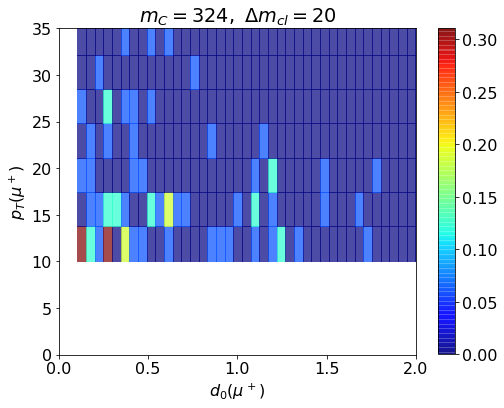

In [56]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(8, 6))

histos2DFromFiles('histos/d0_real_cut_d0/mu_cutd0_cutd0.dat',\
                  'histos/pT_pythia_cut_d0/mu_cutd0_cutpT.dat',0.05)
plt.xlim(0,2)
plt.ylim(0,35)

plt.title("$m_C= 324,\ \\Delta m_{cl}=20$")
plt.xlabel('$d_0(\\mu^+)$')
plt.ylabel('$p_T(\\mu^+)$')


plt.colorbar()
plt.savefig('muon-d0-pT_delta20_cut.png')

['histos/pT_mC120_mlvaries/1-pTl_rr5.00e-08_mS7.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/2-pTl_rr5.00e-08_mS8.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/3-pTl_rr5.00e-08_mS9.00e+01_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/4-pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/6-pTl_rr5.00e-08_mS1.10e+02_mT1.20e+02.dat', 'histos/pT_mC120_mlvaries/cross_sections_mC120.dat']
rr5.00e-08_mS7.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/1-pTl_rr5.00e-08_mS7.00e+01_mT1.20e+02.dat
rr5.00e-08_mS8.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/2-pTl_rr5.00e-08_mS8.00e+01_mT1.20e+02.dat
rr5.00e-08_mS9.00e+01_mT1.20e+02.dat
histos/pT_mC120_mlvaries/3-pTl_rr5.00e-08_mS9.00e+01_mT1.20e+02.dat
rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
histos/pT_mC120_mlvaries/4-pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
rr5.00e-08_mS1.10e+02_mT1.20e+02.dat
histos/pT_mC120_mlvaries/6-pTl_rr5.00e-08_mS1.10e+02_mT1.20e+02.dat


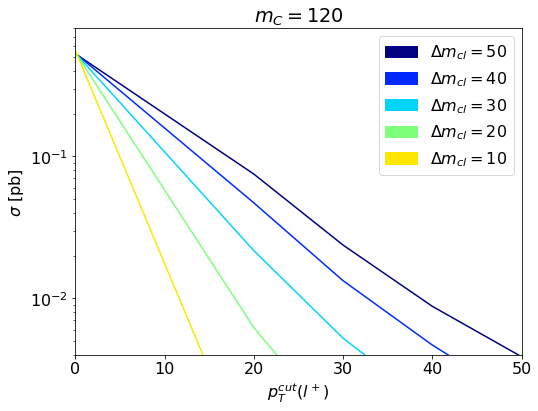

In [79]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_mC120_mlvaries',2,False,0,20,30,40,50,60,70,80,90)


plt.ylim(4*10**(-3),0.8)
plt.xlim(0,50)
plt.yscale("log")

plt.title("$m_C=120$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_mT120.png')

histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


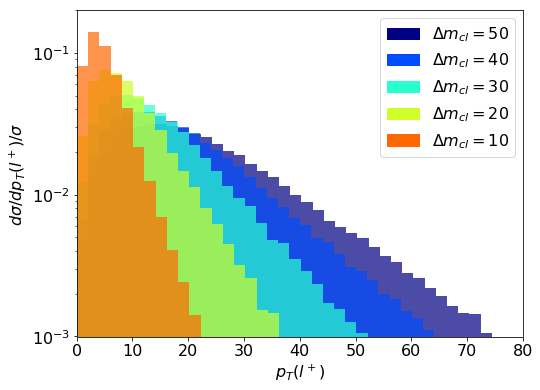

In [125]:
#pTl: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_mCfixed_mlvaries',2,False)


plt.xlim(0,80)
plt.ylim(10**(-3),2*10**(-1))
plt.yscale("log")

#plt.title("$m_C=324$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('ptl_different_splittings.png')

pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


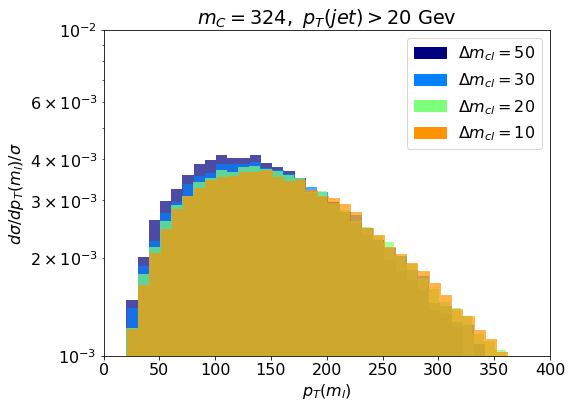

In [8]:
#pT(ml): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('pT-ml_mCfixed_mlvaries',10,False)


plt.xlim(0,400)
plt.ylim(10**(-3),10**(-2))
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$p_T(m_l)$')
plt.ylabel('$d\\sigma/d p_T(m_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('pt_ml_different_splittings.png')

184
103
37


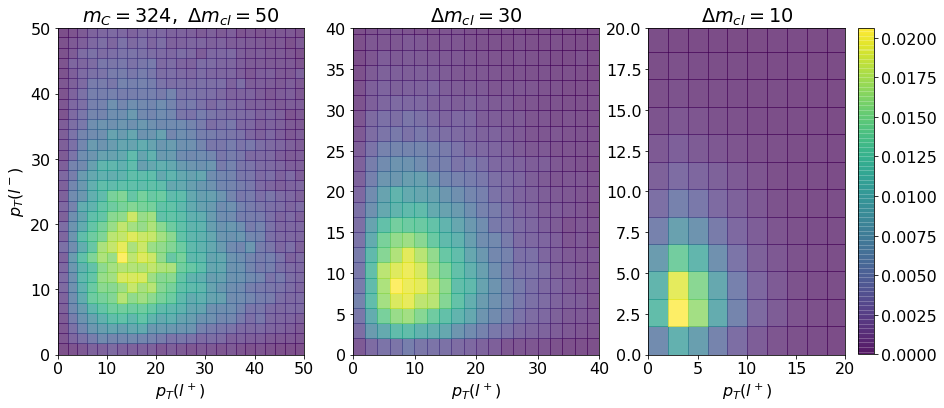

In [30]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
plt.title('njnljn')

plt.subplot(1, 3, 1)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',2)
plt.xlim(0,50)
plt.ylim(0,50)

plt.title("$m_C= 324,\ \\Delta m_{cl}=50$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',2)
plt.xlim(0,40)
plt.ylim(0,40)

plt.title("$\\Delta m_{cl}=30$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',\
                  'histos/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',2)
plt.xlim(0,20)
plt.ylim(0,20)

plt.title("$\\Delta m_{cl}=10$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('ptl-corr_different_splittings.png')

184
103
74


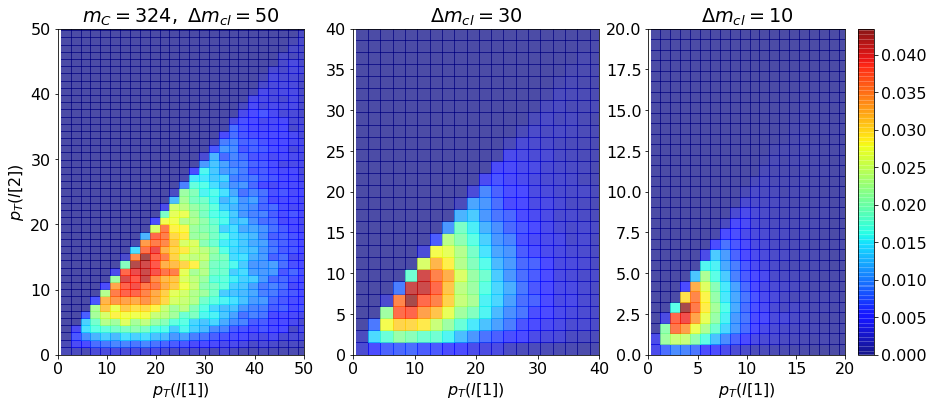

In [29]:
#Correlation of pT[1]&pT[2] for mC fixed, ml varies

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
histos2DFromFiles('histos/pT-leading-2D_mC324_mlvaries/pT_l1_rr5e-08_mS275.0_mT324.0.dat',\
                  'histos/pT-leading-2D_mC324_mlvaries/pT_l2_rr5e-08_mS275.0_mT324.0.dat',2)
plt.xlim(0,50)
plt.ylim(0,50)

plt.title("$m_C= 324,\ \\Delta m_{cl}=50$")
plt.xlabel('$p_T(l[1])$')
plt.ylabel('$p_T(l[2])$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos/pT-leading-2D_mC324_mlvaries/pT_l1_rr5e-08_mS295.0_mT324.0.dat',\
                  'histos/pT-leading-2D_mC324_mlvaries/pT_l2_rr5e-08_mS295.0_mT324.0.dat',2)
plt.xlim(0,40)
plt.ylim(0,40)

plt.title("$\\Delta m_{cl}=30$")
plt.xlabel('$p_T(l[1])$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos/pT-leading-2D_mC324_mlvaries/pT_l1_rr5e-08_mS314.0_mT324.0.dat',\
                  'histos/pT-leading-2D_mC324_mlvaries/pT_l2_rr5e-08_mS314.0_mT324.0.dat',1)
plt.xlim(0,20)
plt.ylim(0,20)

plt.title("$\\Delta m_{cl}=10$")
plt.xlabel('$p_T(l[1])$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('ptl-leading-corr_different_splittings.png')

histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


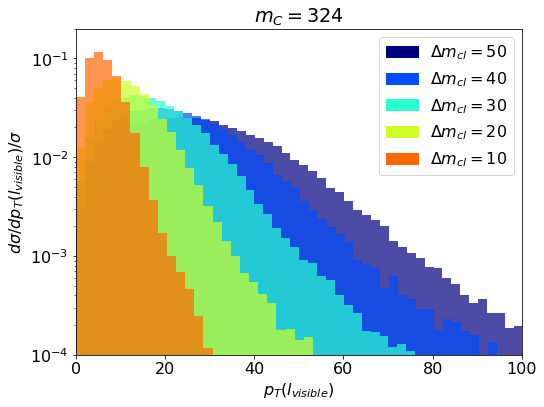

In [7]:
#pTvisible=MET: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTvisible_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('ptvisible_different_splittings.png')

histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/langle_mCfixed_mlvaries/langle_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


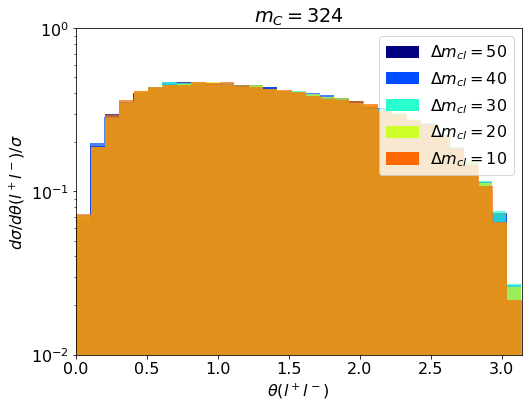

In [8]:
#angle between leptons: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/langle_mCfixed_mlvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('langle_different_splittings.png')

histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/theta-lMET_mCfixed_mlvaries/theta-lMET_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


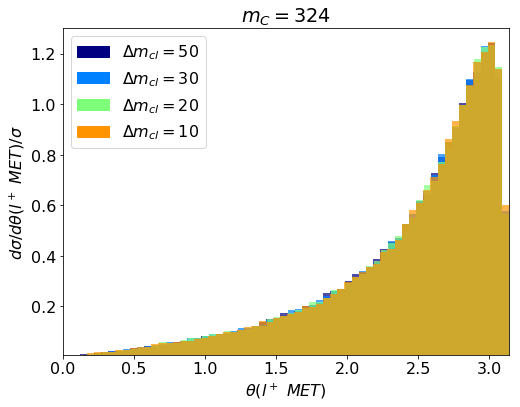

In [25]:
#angle between lepton and MET

plt.figure(figsize=(8, 6))

histosFromFiles('histos/theta-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('angle_lMET_different_splittings.png')

histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/m-lnu_mCfixed_mlvaries/m-lnu_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


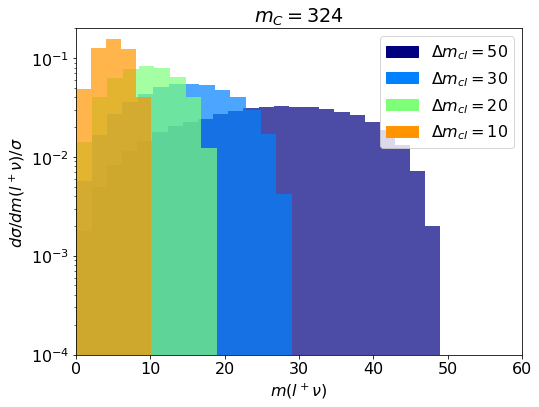

In [16]:
#m(l+ nu): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-lnu_mCfixed_mlvaries',2,False)


plt.xlim(0,60)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('m(lnu)_different_splittings.png')

histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100932
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


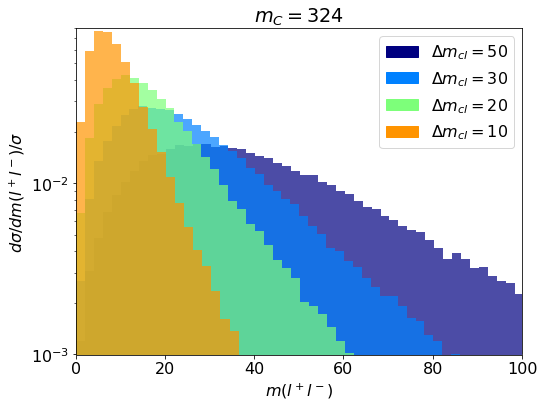

In [22]:
#m(l+ nu): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-ll_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-3),0.08)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('m(ll)_different_splittings.png')

histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100931
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/dphi-lMET_mCfixed_mlvaries/dphi-lMET_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


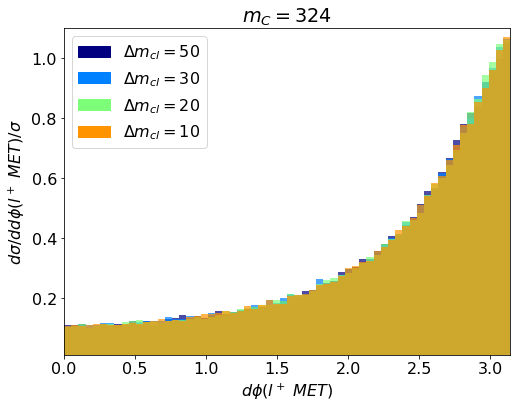

In [31]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('azimuthal_angle_lMET_different_splittings.png')

histos/dphi-psiminus-lminus_mC324_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/dphi-psiminus-lminus_mC324_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/dphi-psiminus-lminus_mC324_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/dphi-psiminus-lminus_mC324_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/dphi-psiminus-lminus_mC324_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


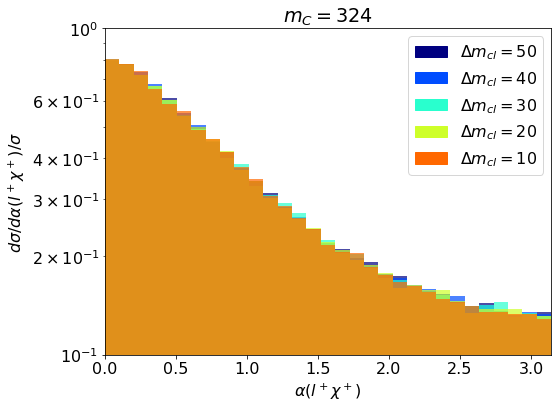

In [14]:
#angle between the mediator and the same-charge lepton: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-psiminus-lminus_mC324_mlvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-1),1)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\alpha(l^+ \\chi^+)$')
plt.ylabel('$d\\sigma/d \\alpha(l^+ \\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('dphi-psiminus-lminus_mC324_different_splittings.png')

histos/dphi-psiminus-lminus_mC120_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/dphi-psiminus-lminus_mC120_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS1.10e+02_mT1.20e+02.dat
100000
histos/dphi-psiminus-lminus_mC120_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS7.00e+01_mT1.20e+02.dat
100000
histos/dphi-psiminus-lminus_mC120_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS8.00e+01_mT1.20e+02.dat
100000
histos/dphi-psiminus-lminus_mC120_mlvaries/dphi-psiminus-lminus_rr5.00e-08_mS9.00e+01_mT1.20e+02.dat
100000


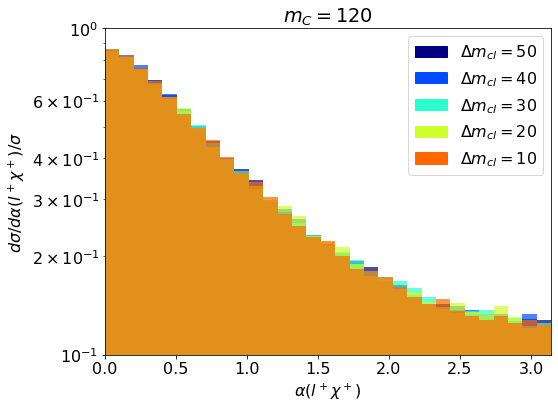

In [30]:
#angle between the mediator and the same-charge lepton: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-psiminus-lminus_mC120_mlvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-1),1)
plt.yscale("log")

plt.title("$m_C=120$")
plt.xlabel('$\\alpha(l^+ \\chi^+)$')
plt.ylabel('$d\\sigma/d \\alpha(l^+ \\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('dphi-psiminus-lminus_mC120_different_splittings.png')

In [13]:
#Delta(m_Cl) fixed, ml varies

#color scheme
colormap = cm.plasma

rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
0.5421404
rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
0.05541315
rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
0.012577656
rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
0.003995297
rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
0.001529157


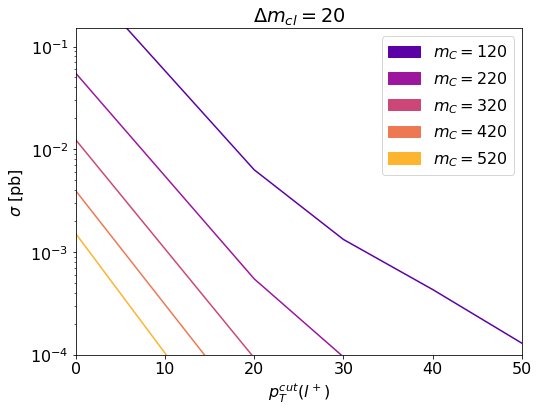

In [266]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos/pT_Delta-fixed_mCvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('cross-section_drop_with_pTcut_Delta_fixed.png')

histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pT_Delta-fixed_mCvaries/pTl_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


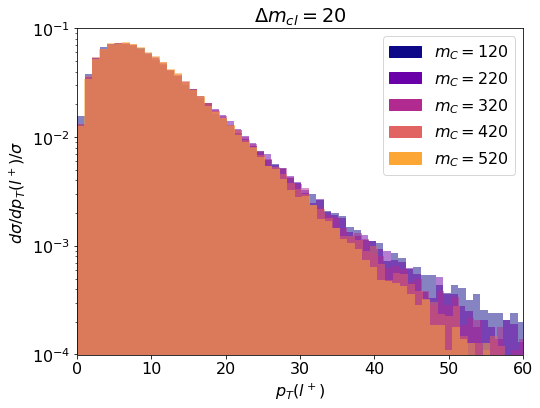

In [115]:
#pTl: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pT_Delta-fixed_mCvaries',1,False)


plt.xlim(0,60)
plt.ylim(10**(-4),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptl_different_mC.png')

90
66
47


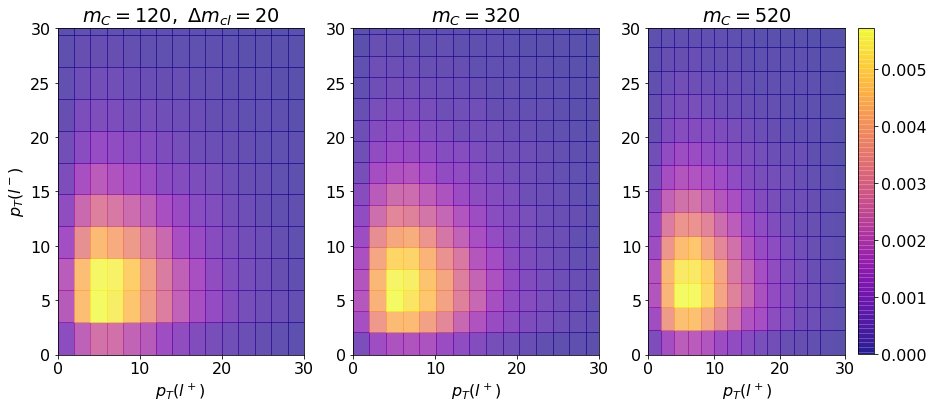

In [40]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
plt.title('njnljn')

plt.subplot(1, 3, 1)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=120,\ \\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=320$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',\
                  'histos/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=520$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('ptl-corr_different_mT.png')

histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTnu_Delta-fixed_mCvaries/pTnu_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


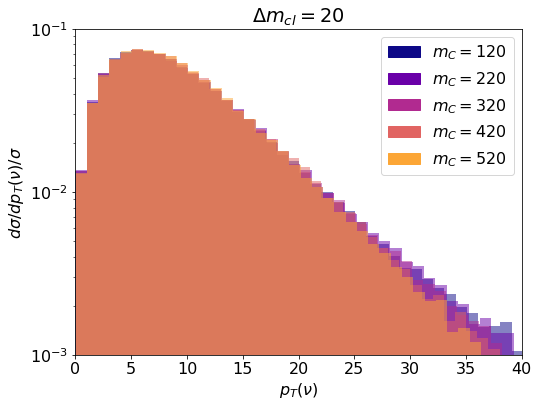

In [110]:
#pT(nu): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTnu_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-3),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\nu)$')
plt.ylabel('$d\\sigma/d p_T(\\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')
plt.savefig('pt(nu)_different_mC.png')

histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTchil_Delta-fixed_mCvaries/pTpsil_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


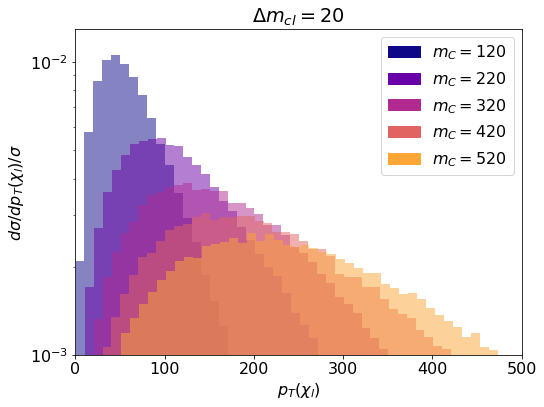

In [95]:
#pT(chi_l): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTchil_Delta-fixed_mCvaries',10,False)


plt.xlim(0,500)
plt.ylim(10**(-3),0.013)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\chi_l)$')
plt.ylabel('$d\\sigma/d p_T(\\chi_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('pt(chil)_different_mC.png')

histos/d0_e_ctau2cm_different_mC/rr1.00e-08_mS1.00e+02_mT1.20e+02d0_e_cut.dat
4091
min=-13.815510557964274, max=4.024735357983991
492
histos/d0_e_ctau2cm_different_mC/rr1.00e-08_mS2.00e+02_mT2.20e+02d0_e_cut.dat
3954
min=-13.815510557964274, max=3.156140264087029
697
histos/d0_e_ctau2cm_different_mC/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_e_cut.dat
3829
min=-13.122363377404328, max=3.9677423264928544
2
histos/d0_e_ctau2cm_different_mC/rr1.00e-08_mS4.00e+02_mT4.20e+02d0_e_cut.dat
3546
min=-13.815510557964274, max=3.481476676731302
243
histos/d0_e_ctau2cm_different_mC/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_e_cut.dat
3284
min=-13.815510557964274, max=3.245234132345097
56


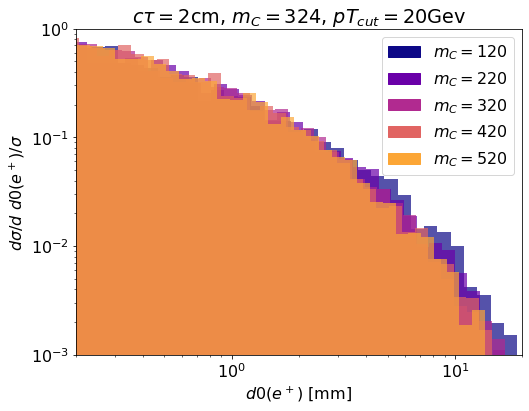

In [18]:
#d0(e) different splittings 

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/d0_e_ctau2cm_different_mC',300,False)


plt.xlim(0.2,20)
plt.ylim(10**(-3),1)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $pT_{cut}=20$Gev")
plt.xlabel('$d0(e^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(e^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('d0(e)_ctau2cm_different_mC_pTcut.png')

histos/d0_mu_ctau2cm_different_mC/rr1.00e-08_mS1.00e+02_mT1.20e+02d0_mu_cut.dat
3772
min=-9.10598035665194, max=3.8292141672072337
524
histos/d0_mu_ctau2cm_different_mC/rr1.00e-08_mS2.00e+02_mT2.20e+02d0_mu_cut.dat
3838
min=-11.736069016284437, max=3.7976239426715357
981
histos/d0_mu_ctau2cm_different_mC/rr1.00e-08_mS3.04e+02_mT3.24e+02d0_mu_cut.dat
3467
min=-9.09701168666918, max=3.365267533002864
758
histos/d0_mu_ctau2cm_different_mC/rr1.00e-08_mS4.00e+02_mT4.20e+02d0_mu_cut.dat
3503
min=-9.672375831572742, max=3.240108566318377
124
histos/d0_mu_ctau2cm_different_mC/rr1.00e-08_mS5.00e+02_mT5.20e+02d0_mu_cut.dat
3090
min=-7.652195753929633, max=3.5242756763589895
255


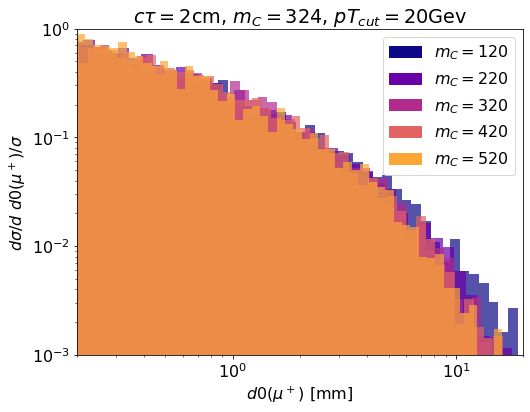

In [20]:
#d0(e) different splittings 

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/d0_mu_ctau2cm_different_mC',300,False)


plt.xlim(0.2,20)
plt.ylim(10**(-3),1)
plt.yscale("log")
plt.xscale("log")

plt.title("$c\\tau=2$cm, $m_C=324$, $pT_{cut}=20$Gev")
plt.xlabel('$d0(\\mu^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ d0(\\mu^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('d0(mu)_ctau2cm_different_mC_pTcut.png')

histos/lifetime_ctau2cm_different_mC/rr1.00e-08_mS1.00e+02_mT1.20e+02_ctau_plus.dat
100000
min=-8.902855672228222, max=7.463638465993369
81323
histos/lifetime_ctau2cm_different_mC/rr1.00e-08_mS2.00e+02_mT2.20e+02_ctau_plus.dat
100000
min=-8.487634389174692, max=6.205549787520903
51166
histos/lifetime_ctau2cm_different_mC/rr1.00e-08_mS3.04e+02_mT3.24e+02_ctau_plus.dat
100000
min=-8.656455258749745, max=5.9480297097933414
12622
histos/lifetime_ctau2cm_different_mC/rr1.00e-08_mS4.00e+02_mT4.20e+02_ctau_plus.dat
100000
min=-8.628124752123519, max=5.634593273183493
13273
histos/lifetime_ctau2cm_different_mC/rr1.00e-08_mS5.00e+02_mT5.20e+02_ctau_plus.dat
100000
min=-9.903487552536127, max=5.43333085282896
41289


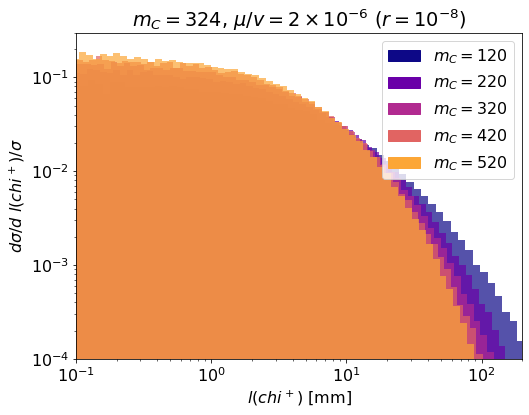

In [21]:
#ctau(chil)

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/lifetime_ctau2cm_different_mC',300,False)


plt.xlim(10**(-1),200)
plt.ylim(10**(-4),0.3)
plt.yscale("log")
plt.xscale("log")

plt.title("$m_C=324$, $\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$l(chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ l(chi^+)/\\sigma$')



patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('lifetime_ctau2cm_different_mC.png')

histos/betagamma_ctau2cm_different_mC/rr1.00e-08_mS1.00e+02_mT1.20e+02_betagamma_plus.dat
639786
min=-3.823645894810733, max=3.6541730959097234
506047
histos/betagamma_ctau2cm_different_mC/rr1.00e-08_mS2.00e+02_mT2.20e+02_betagamma_plus.dat
656221
min=-3.9586954136265766, max=3.0063040449363547
249249
histos/betagamma_ctau2cm_different_mC/rr1.00e-08_mS3.04e+02_mT3.24e+02_betagamma_plus.dat
664175
min=-3.635300773212707, max=2.653880211588496
630867
histos/betagamma_ctau2cm_different_mC/rr1.00e-08_mS4.00e+02_mT4.20e+02_betagamma_plus.dat
669993
min=-4.421266548011485, max=2.5054732825432904
113941
histos/betagamma_ctau2cm_different_mC/rr1.00e-08_mS5.00e+02_mT5.20e+02_betagamma_plus.dat
674906
min=-4.482421720729038, max=2.30677500304884
514711


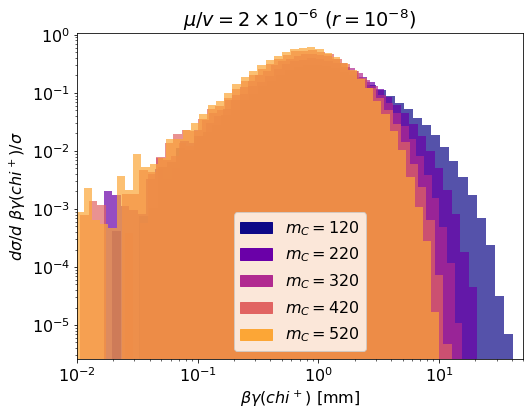

In [24]:
# beta*gamma

plt.figure(figsize=(8, 6))

histosFromFilesLog('histos/betagamma_ctau2cm_different_mC',100,False)

plt.xlim(10**(-2),50)
#plt.ylim(10**(-6),3)

plt.yscale("log")
plt.xscale("log")

plt.title("$\\mu/v=2\\times 10^{-6}\ (r=10^{-8})$")
plt.xlabel('$\\beta \\gamma(chi^+)$ [mm]')
plt.ylabel('$d\\sigma/d\ \\beta \\gamma (chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='lower center')


plt.savefig('betagamma_ctau2cm_different_mC.png')

histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/pTvisible_Delta-fixed_mCvaries/pTvisible_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


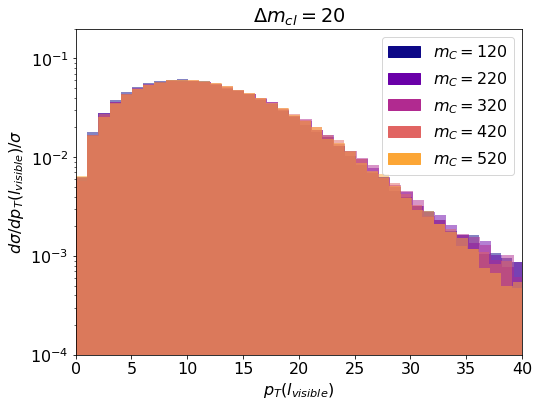

In [93]:
##### pTvisible=MET: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/pTvisible_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptvisible_different_mC.png')

histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/langle_Delta-fixed_mCvaries/langle_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


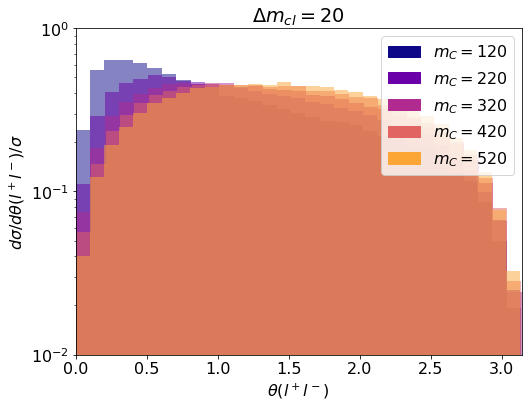

In [78]:
#angle between leptons: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/langle_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('langle_different_mC.png')

histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/theta-lMET_Delta-fixed_mCvaries/theta-lMET_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


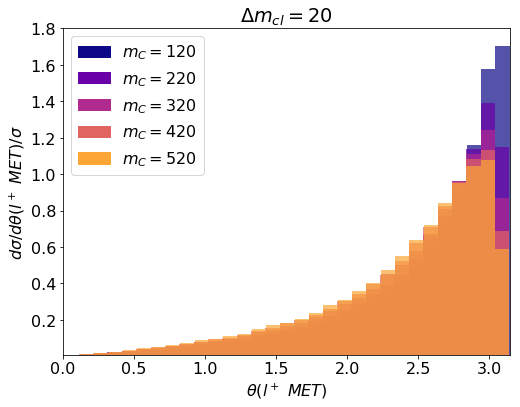

In [50]:
#angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/theta-lMET_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.8)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('angle_lMET_different_mC.png')

histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/dphi-lMET_Delta-fixed_mCvaries/dphi-lMET_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


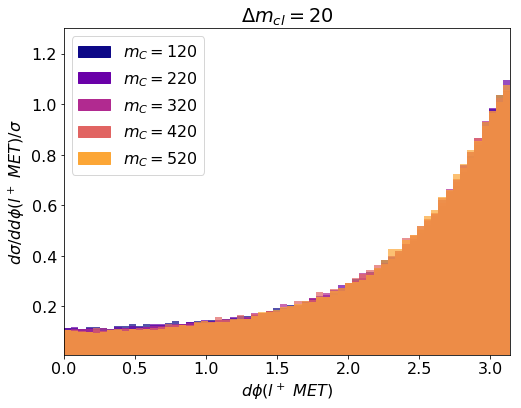

In [82]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-lMET_Delta-fixed_mCvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('azimuthal_angle_lMET_different_mC.png')

histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/m-lnu_Delta-fixed_mCvaries/m-lnu_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


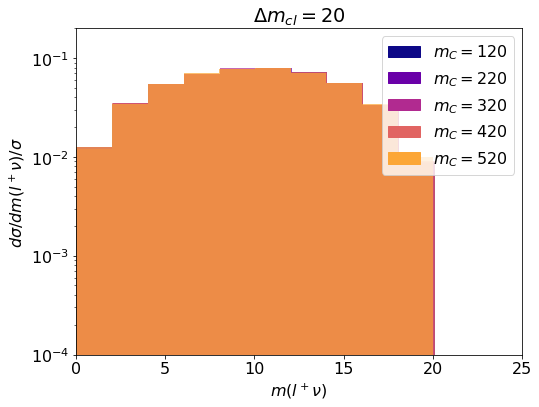

In [83]:
#m(l+ nu): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-lnu_Delta-fixed_mCvaries',2,False)


plt.xlim(0,25)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('m(lnu)_different_mC.png')

histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/m-ll_Delta-fixed_mCvaries/m-ll_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


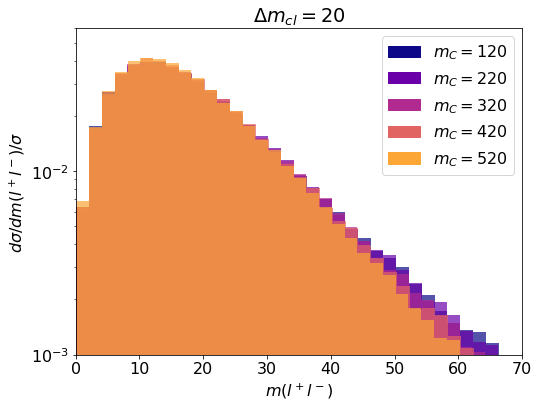

In [84]:
#m(l+ nu): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/m-ll_Delta-fixed_mCvaries',2,False)


plt.xlim(0,70)
plt.ylim(10**(-3),0.06)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('m(ll)_different_mC.png')

histos/dphi-psiminus-lminus-Delta-fixed_mCvaries/dphi-psiminus-lminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000
histos/dphi-psiminus-lminus-Delta-fixed_mCvaries/dphi-psiminus-lminus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
100000
histos/dphi-psiminus-lminus-Delta-fixed_mCvaries/dphi-psiminus-lminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/dphi-psiminus-lminus-Delta-fixed_mCvaries/dphi-psiminus-lminus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/dphi-psiminus-lminus-Delta-fixed_mCvaries/dphi-psiminus-lminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


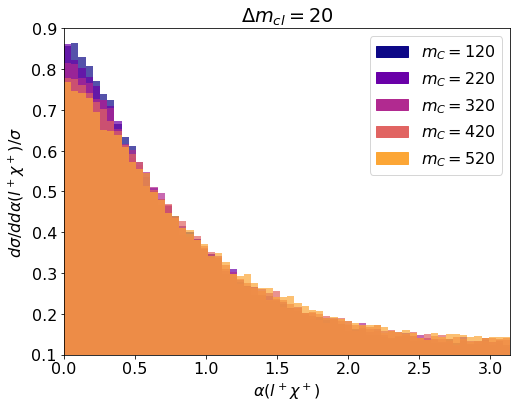

In [28]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos/dphi-psiminus-lminus-Delta-fixed_mCvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-1),0.9)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\alpha(l^+\chi^+)$')
plt.ylabel('$d\\sigma/d d\\alpha(l^+\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('dphi-psiminus-lminus_different_mC.png')

In [140]:
#Charged states

#color scheme
colormap = cm.viridis

histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_pT_mCvaries/pTminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


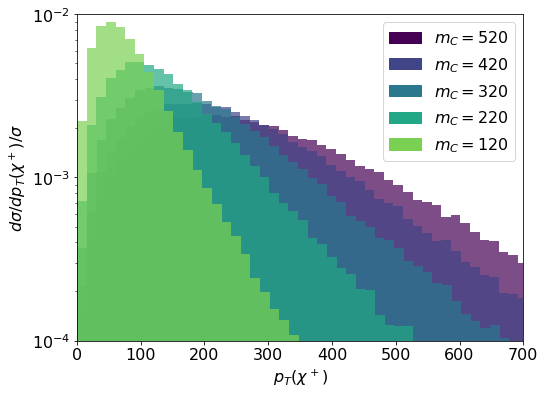

In [141]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_pT_mCvaries',15,True)


plt.xlim(0,700)
plt.ylim(10**(-4),10**(-2))
plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('ptcharged_different_mC.png')

histos/charged_pT_520/pTminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000


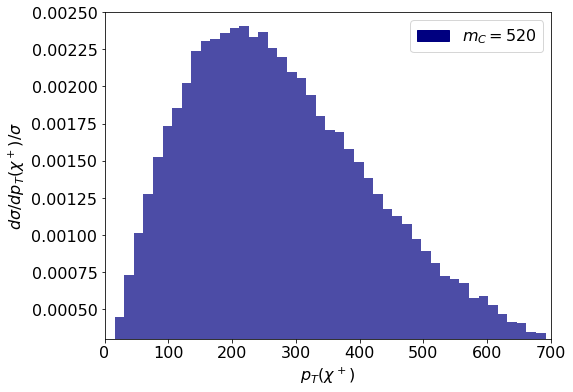

In [131]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_pT_520',15,True)


plt.xlim(0,700)
plt.ylim(3*10**(-4),2.5*10**(-3))
#plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')


plt.legend(handles=[patch1],loc='upper right')

plt.savefig('ptcharged_mC520.png')

In [139]:
#comparing the ratio # of events for pT=200/(pT=500 or 100) with fig.5 in 1605.06509 (notice that their mass is 470):

print('our(200/500)={}'.format(0.0024/0.00075)) #Our result
print('their(200/500)={}'.format(0.17/0.05)) #Our result

print('our(200/100)={}'.format(0.0024/0.00125)) #Our result
print('their(200/100)={}'.format(0.17/0.14)) #Our result

our(200/500)=3.1999999999999997
their(200/500)=3.4
our(200/100)=1.9199999999999997
their(200/100)=1.2142857142857142


histos/charged_p_mCvaries/pminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_p_mCvaries/pminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


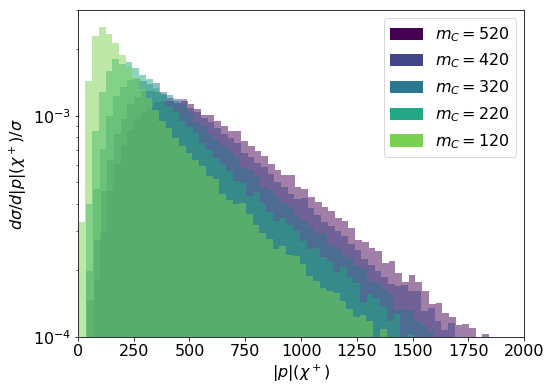

In [120]:
#|p| charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_p_mCvaries',30,True)


plt.xlim(0,2000)
plt.ylim(10**(-4),3*10**(-3))
plt.yscale("log")

plt.xlabel('$|p|(\\chi^+)$')
plt.ylabel('$d\\sigma/d |p|(\\chi^+)/\\sigma$')

patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('p_charged_different_mC.png')


histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_eta_mCvaries/etapluus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


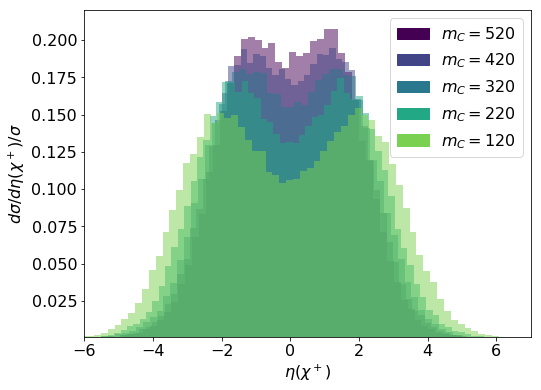

In [64]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_eta_mCvaries',0.1,True)

        
plt.xlim(-6,7)
plt.ylim(10**(-3),0.22)
#plt.yscale("log")

plt.xlabel('$\\eta(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\eta(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('eta_charged_different_mC.png')

histos/charged_y_mCvaries/y_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_y_mCvaries/y_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_y_mCvaries/y_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


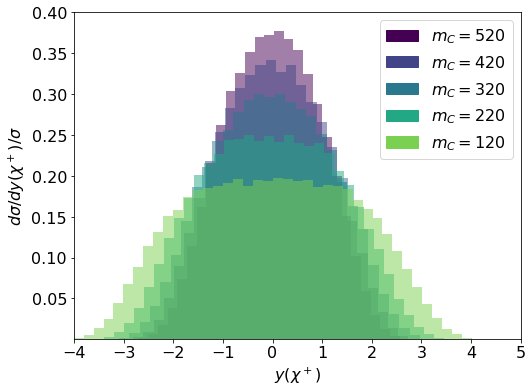

In [65]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_y_mCvaries',0.1,True)


plt.xlim(-4,5)
plt.ylim(10**(-3),0.4)
#plt.yscale("log")

plt.xlabel('$y(\\chi^+)$')
plt.ylabel('$d\\sigma/d y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('y_charged_different_mC.png')

histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS2.00e+02_mT2.20e+02.dat
102046
histos/charged_Dy_mCvaries/Dy_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


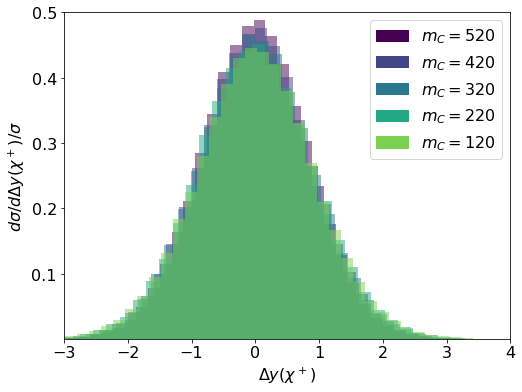

In [66]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_Dy_mCvaries',0.1,True)


plt.xlim(-3,4)
plt.ylim(10**(-3),0.5)
#plt.yscale("log")

plt.xlabel('$\\Delta y(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\Delta y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('Dy_charged_different_mC.png')

histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS5.00e+02_mT5.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS4.00e+02_mT4.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS3.00e+02_mT3.20e+02.dat
100000
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS2.00e+02_mT2.20e+02.dat
102045
histos/charged_thetaPM_mCvaries/thetaPM_manual_rr3.00e-08_mS1.00e+02_mT1.20e+02.dat
100000


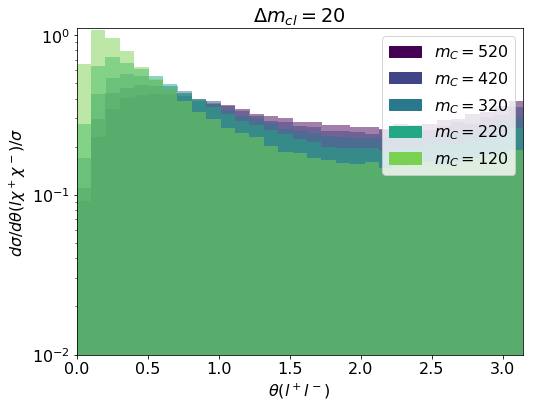

In [68]:
#angle between charged states:

plt.figure(figsize=(8, 6))

histosFromFiles('histos/charged_thetaPM_mCvaries',0.1,True)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l\\chi^+ \\chi^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('theta_charged_different_mC.png')

In [9]:
(1300594-595)/12

108333.25